<img src="https://i.ibb.co/Q9GGTLY/ezgif-com-gif-maker.jpg" width="400">

This notebook is the take home assignment for MLE intern at **wikilimi**. The aim of this notebook is to collect,analyze and building models for **Geospatial Data** data. There are some steps, provided in the assignment, which are-
1. Procuring and Reading Geospatial Data
2. Exploring and Visualising Geospatial Data
3. Preprocessing Geospatial Data
4. Deep Learning for Geospatial Data

In [1]:
!pip install cdsapi

  Created wheel for cdsapi: filename=cdsapi-0.4.0-py2.py3-none-any.whl size=11692 sha256=e9516427386bbf66d4d192f291ad6d835813fc4e214233286701684bbde94441
  Stored in directory: /root/.cache/pip/wheels/40/ee/c6/d596a9661e9408440cb33adc7881461cb1d69dbb455f808f78
Successfully built cdsapi


In [2]:
!pip install xarray

In [3]:
# Import cdsapi
import cdsapi
# Open a new Client instance
c = cdsapi.Client()
# Send your request (download data)
c.retrieve('reanalysis-era5-land', {
        
        'variable':     ('2m_temperature','total_precipitation','volumetric_soil_water_layer_1'),
        'year':         '2019',
        'month':        '12',
        'day':          ('01','02','03','04','05','06','07'),
        'time':         '12:00',
        'format': 'netcdf'

    }, 'data2.nc')



2020-12-23 15:08:16,151 INFO Welcome to the CDS
2020-12-23 15:08:16,153 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2020-12-23 15:08:16,248 INFO Request is completed
2020-12-23 15:08:16,249 INFO Downloading https://download-0015.copernicus-climate.eu/cache-compute-0015/cache/data6/adaptor.mars.internal-1608532590.4132662-11316-3-2c874aa0-d95e-4705-811a-708685a097a4.nc to data2.nc (259.7M)
2020-12-23 15:08:29,370 INFO Download rate 19.8M/s


Result(content_length=272334400,content_type=application/x-netcdf,location=https://download-0015.copernicus-climate.eu/cache-compute-0015/cache/data6/adaptor.mars.internal-1608532590.4132662-11316-3-2c874aa0-d95e-4705-811a-708685a097a4.nc)

In [6]:
!ls

data2.nc  sample_data


In [4]:
import pandas as pd
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

from IPython import display
from IPython.display import HTML

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf

In [5]:
xdata = xr.open_dataset('/content/data2.nc')

In [34]:
df = xdata.to_dataframe()

In [35]:
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

df.head(10)

t2m  tp  swvl1
latitude longitude time                               
90.0     0.0       2019-12-01 12:00:00  NaN NaN    NaN
                   2019-12-02 12:00:00  NaN NaN    NaN
                   2019-12-03 12:00:00  NaN NaN    NaN
                   2019-12-04 12:00:00  NaN NaN    NaN
                   2019-12-05 12:00:00  NaN NaN    NaN
                   2019-12-06 12:00:00  NaN NaN    NaN
                   2019-12-07 12:00:00  NaN NaN    NaN
         0.1       2019-12-01 12:00:00  NaN NaN    NaN
                   2019-12-02 12:00:00  NaN NaN    NaN
                   2019-12-03 12:00:00  NaN NaN    NaN

In [36]:
df1 = df
df1.reset_index(inplace=True)
df1.head()

latitude  longitude                time  t2m  tp  swvl1
0      90.0        0.0 2019-12-01 12:00:00  NaN NaN    NaN
1      90.0        0.0 2019-12-02 12:00:00  NaN NaN    NaN
2      90.0        0.0 2019-12-03 12:00:00  NaN NaN    NaN
3      90.0        0.0 2019-12-04 12:00:00  NaN NaN    NaN
4      90.0        0.0 2019-12-05 12:00:00  NaN NaN    NaN

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45385200 entries, 0 to 45385199
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   latitude   float64       
 1   longitude  float64       
 2   time       datetime64[ns]
 3   t2m        float32       
 4   tp         float32       
 5   swvl1      float32       
dtypes: datetime64[ns](1), float32(3), float64(2)
memory usage: 1.5 GB


In [14]:
df1.isna().sum()

latitude            0
longitude           0
time                0
t2m          29895159
tp           29895159
swvl1        29895159
dtype: int64

### This shows how much Nan values the data has.
For filling this up we can do many things and some of them are 
1. use linear interpolationfor filling Nan
2. Follow the forward and backward trends and fill using forward fill or back ward fill. We can do this for the places where the data has non continious nan values.

In [147]:
df1.shape

(45385200, 6)

In [12]:
xdata

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 7)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 nan nan ... 243.09929
    tp         (time, latitude, longitude) float32 nan nan nan ... 0.0 0.0 0.0
    swvl1      (time, latitude, longitude) float32 nan nan ... 0.2060981
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-21 06:36:38 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [18]:
xdata.dims["longitude"]*4

14400

In [4]:
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

# Exploring and Visualising Geospatial Data:
In this part some specific instructions were provided. Which are-
1. Calculate the basic statistics with some comments
2. Check for missing values and comment how to handel that
3. Plot a randomly chosen day from each of the datasets
4. Visualise the distribution of the datasets using matplotlib hist() and make some comments on that

### How I tackled this section:
I have done all the steps as provided above, for sake of simplisity I have devided this section into three parts,which are like- 
- Analysis for `t2m`

- Analysis for `tp`

- Analysis for `swvl1`

I will describe all the things like what is `t2m`,`tp` and `swvl1`, How did I handeled the analysis for each of the variables.

# Analysis for `t2m`:

|Name|Unit|Description|
|----|----|-----------|
|2m temperature(t2m)|K|Temperature of air at 2m above the surface of land, sea or in-land waters. 2m temperature is calculated by interpolating between the lowest model level and the Earth's surface, taking account of the atmospheric conditions. Temperature measured in kelvin can be converted to degrees Celsius (°C) by subtracting 273.15.|

`t2m`is the temperature of air at 2m above the surface of land, sea or in-land waters.



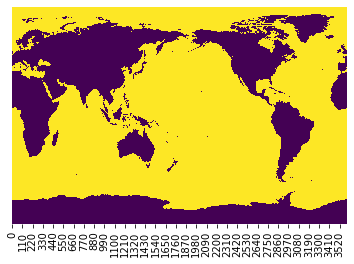

In [6]:
import seaborn as sns
sns.heatmap(xdata['t2m'].isel(time=0).isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Change of `t2m` per day in all longitude and latitude:
Here I have taken the data for `t2m`vfor all 7 days and created an animation which shows how `t2m` changes all over the world each day.

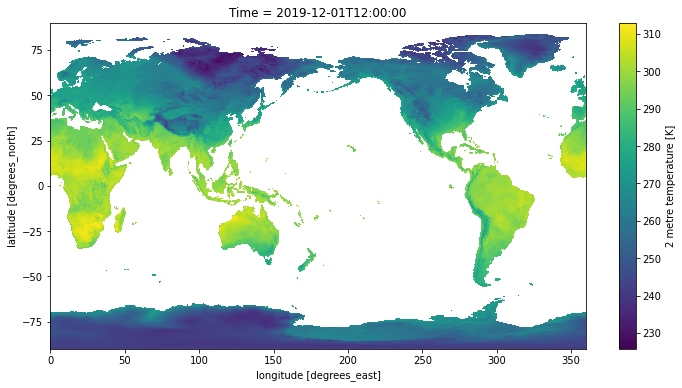

In [6]:

# Get a handle on the figure and the axes
fig, ax = plt.subplots(figsize=(12,6))

# Plot the initial frame. 
cax = xdata['t2m'][0,:,:].plot(
    add_colorbar=True,
    cbar_kwargs={
        'extend':'neither'
    }
)
# xdata['t2m'].isel(time=slice(x,x+1))  
# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    # cax.set_array(tas[frame,:,:].values.flatten())
    cax.set_array(xdata['t2m'][frame,:,:].values.flatten())
    ax.set_title("Time = " + str(xdata['t2m'].coords['time'].values[frame])[:19])

# Finally, we use the animation module to create the animation.
ani = FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=6,       # Could also be iterable or list
    interval=200     # ms between frames
)

In [7]:
HTML(ani.to_jshtml())

This analysis shows that the values are changing but the amount of change/delta is very less. By this animations you gets an overoll view of the data for `t2m`. Anf after that you can go to look into further analysis. Which I will be doing by going into more specific latitude and longitude.

### Interpolation part from Preprocessing Geospatial Data:
I have done this here because of two reasons.
It was instructed to to perform interpolation because the spatial resolution of the dataset is  0.1 degree x 0.1 degree but we need to increase it to 0.05 degree x 0.05 degree but after performing that the number of rows increased to 181540800 which upsamples the data but while processing I was started to give me out of memory errors So I had to restrict it from using further.But I needed to show that I have completed this section so I provided this here With a visualization of before and after doing interpolation.

I used linear interpolation for doing that.

In [6]:
new_lon = np.linspace(xdata.longitude[0], xdata.longitude[-1], xdata.dims["longitude"] * 2)
new_lat = np.linspace(xdata.latitude[0], xdata.latitude[-1], xdata.dims["latitude"] * 2)

dsi = xdata.interp(latitude=new_lat, longitude=new_lon)

In [8]:
dsi

<xarray.Dataset>
Dimensions:    (latitude: 3602, longitude: 7200, time: 7)
Coordinates:
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
  * latitude   (latitude) float64 90.0 89.95 89.9 89.85 ... -89.9 -89.95 -90.0
  * longitude  (longitude) float64 0.0 0.04999 0.09999 ... 359.8 359.9 359.9
Data variables:
    t2m        (time, latitude, longitude) float64 nan nan nan ... 243.1 243.1
    tp         (time, latitude, longitude) float64 nan nan nan ... 0.0 0.0 0.0
    swvl1      (time, latitude, longitude) float64 nan nan nan ... 0.2061 0.2061
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-21 06:36:38 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

### visualization of before and after of performing interpolation:

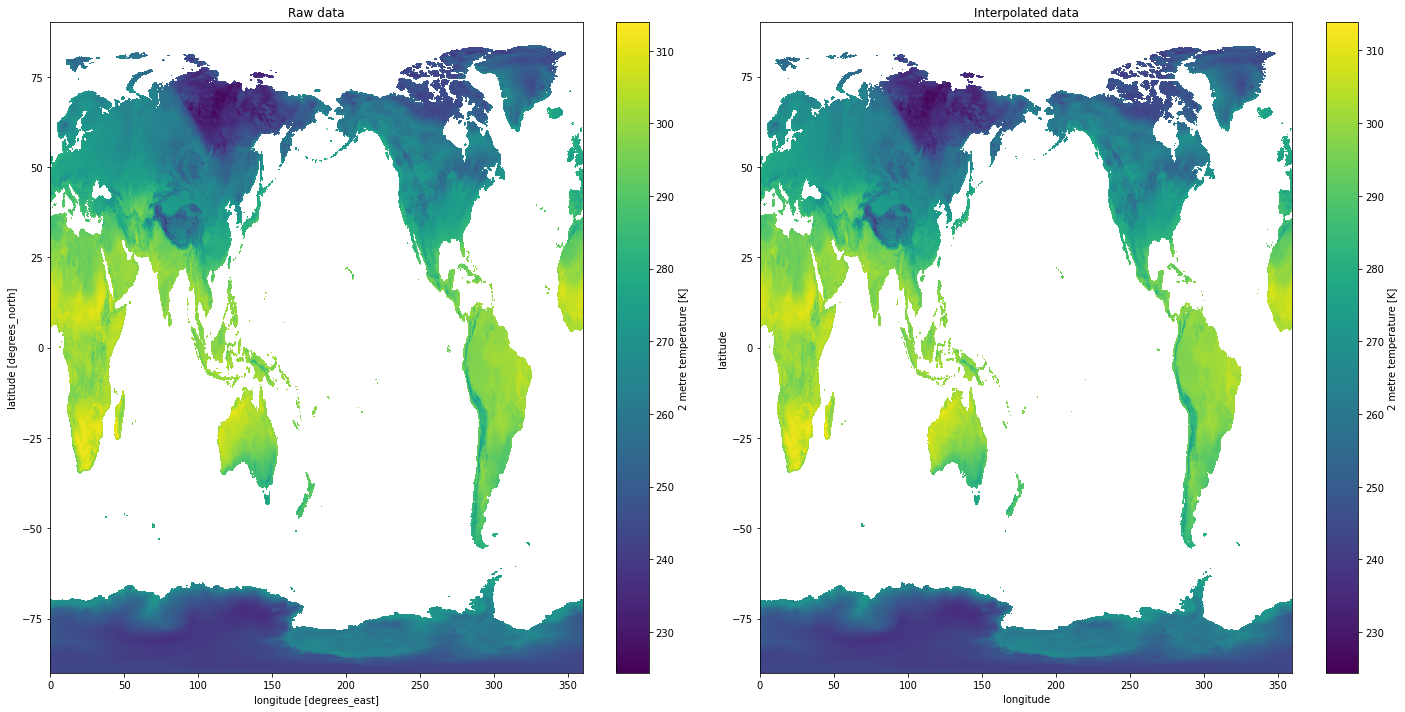

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
# fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
# plt.figure(figsize=(10, 20))
xdata['t2m'].isel(time=slice(1,2)).plot(ax=axes[0])
dsi['t2m'].isel(time=slice(1,2)).plot(ax=axes[1])
# data['t2m'].isel(time=slice(3,4)).plot(ax=axes[1,0])
# data['t2m'].isel(time=slice(4,5)).plot(ax=axes[1,1])
# air1d.plot(ax=axes[0])
axes[0].set_title("Raw data")
axes[1].set_title("Interpolated data")
fig.tight_layout()
# plt.subplot_tool()
plt.show()

the left plot is made using the previous data and the right plot is made using the interpolated data.
Points to Note:
1. After applying this the edges of land areas became more smoother.
2. By the help of interpolated data we can access different coordinates more specificly.
3. I did not filled the Nan values using interpolation. Because of that the sea section of the plot is white.

# Histogram of Each day for `t2m`:

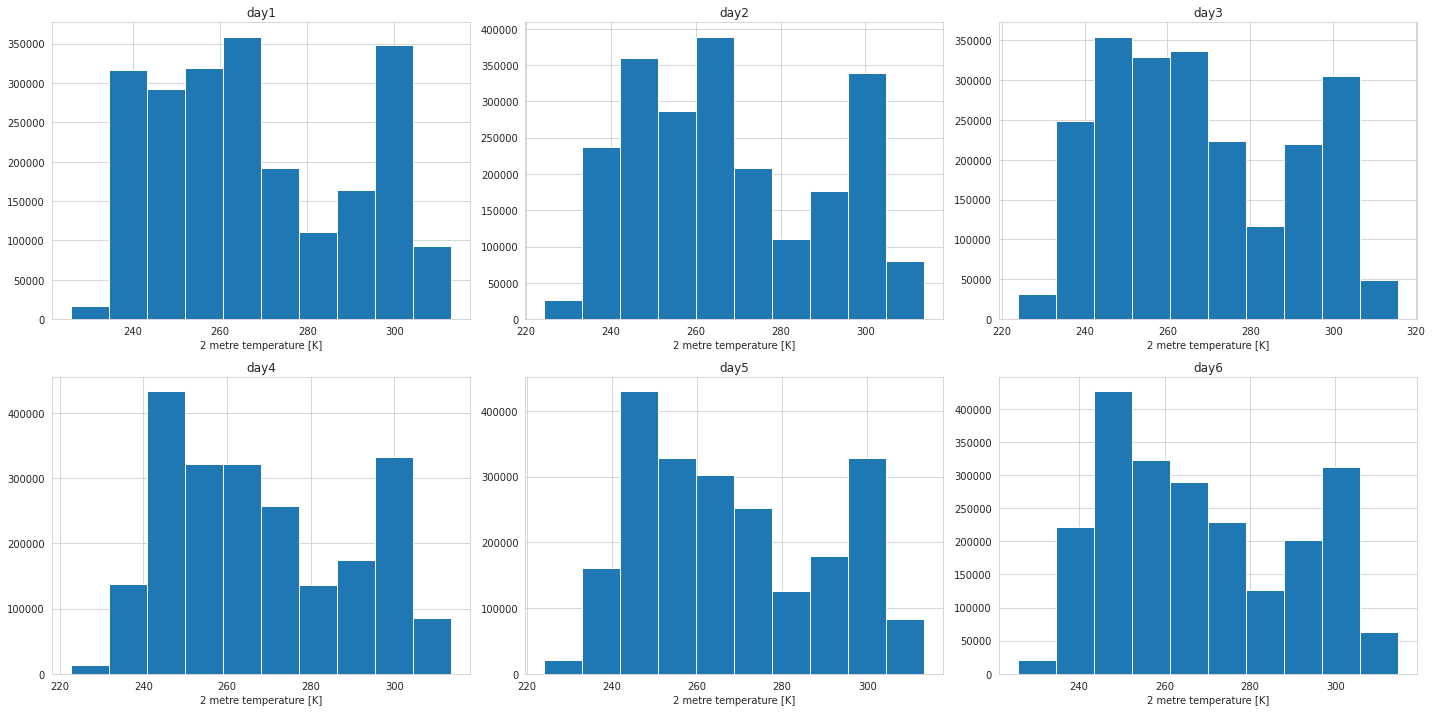

In [31]:
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(20, 10))
# fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
# plt.figure(figsize=(10, 20))
xdata['t2m'].isel(time=slice(0,1)).plot.hist(ax=axes[0,0])
xdata['t2m'].isel(time=slice(1,2)).plot.hist(ax=axes[0,1])
xdata['t2m'].isel(time=slice(2,3)).plot.hist(ax=axes[0,2])
xdata['t2m'].isel(time=slice(3,4)).plot.hist(ax=axes[1,0])
xdata['t2m'].isel(time=slice(4,5)).plot.hist(ax=axes[1,1])
xdata['t2m'].isel(time=slice(5,6)).plot.hist(ax=axes[1,2])
# dsi['t2m'].isel(time=slice(6,7)).plot(ax=axes[1])
# data['t2m'].isel(time=slice(3,4)).plot(ax=axes[1,0])
# data['t2m'].isel(time=slice(4,5)).plot(ax=axes[1,1])
# air1d.plot(ax=axes[0])
axes[0,0].set_title("day1")
axes[0,1].set_title("day2")
axes[0,2].set_title("day3")
axes[1,0].set_title("day4")
axes[1,1].set_title("day5")
axes[1,2].set_title("day6")
fig.tight_layout()
# plt.subplot_tool()
plt.show()

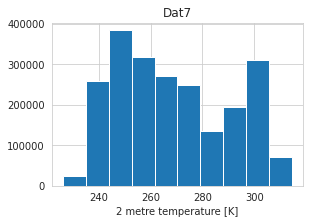

In [33]:
xdata['t2m'].isel(time=slice(6,7)).plot.hist(size=3)
plt.title("Dat7")
plt.grid(True)

Points to Note:
1. The subplot is consists of first 6 days and the bottom one is the histogram for 7th day.
2. The data for `t2m` is not properly distributed as we can see two long spikes in all of the plots.
4. We can see that the distribution of the data for `day1`,`day2`,`day3`,`day4` follows a same pattern and the data for `day5`,`day6` and `day7` follows a same pattern.
5. This plots shows that the range of temperature at 2m from surface is from 240 to 280 in all coordinates of the world.And there are very less places where the temp. goes upto 300k+ and temp. gets down to less than 240K. 

## Place specific Analysis:

In this section I have taken two places for analysis of all of the variables, which are **Himalayas** and **Whole India**.
I have done different analysis for these two place, please look into them.

## Lets look how t2m changes per day in Himalayas

## Line plot of change of `t2m` per day at Himalaya:
ps: I got the coordinates from google

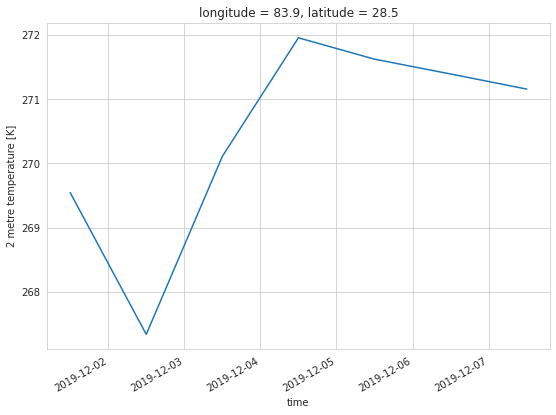

In [40]:
xdata['t2m'].sel(time=slice('2019-12-01 12:00:00','2019-12-07 12:00:00')).sel(latitude=28.5, longitude=83.9, method='nearest').plot(size=6)

1. This plot shows how the temp. is changing every day at Himalayas. 
2. This plot shows that at december 2019 temp went down first then it started raising up then after the 5th day temp. got bit low.Which is true as in Himalaya at the time of December its winter season so having temp around ~270k is normal.
3. There was a certain fluctuation from day 1 and day 2 which can be analyzed further if we have the data for previous months and the data for precious year's data from december month. By that we can analyze the trend and make predictions also.  

### heatmap Plot of `t2m` for the Himalaya regions   

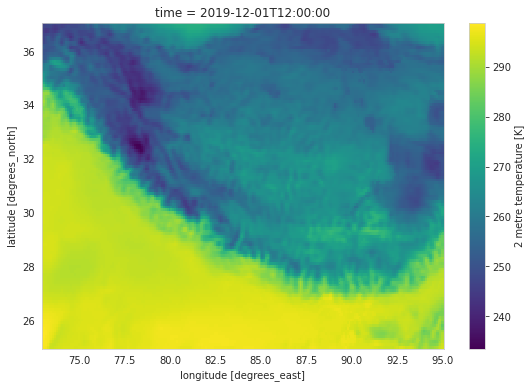

In [71]:
xdata['t2m'].isel(time=0).sel(longitude=slice(73,95), latitude=slice(37,25)).plot(size=6)

1. Himalaya part and the above portion has temp. around ~240k to ~270K but the lower area(nepal and india part) is having increase in temp.(This is true because there is a certain difference of temp. between Himalayan areas and adjacent indian and nepal regions)
2. Here we can apply interpolation to upscale and dive deeper into specific areas of this region. 

In [ ]:
#CAN APPLY INTERPOLATION FOR UPSAMPLING WHICH WILL INCREASE THE "spatial resolution"

In [84]:
# xdata['t2m'].isel(time=0).sel(longitude=slice(73,95), latitude=slice(37,25)).plot.hist(size=4)

### How its changing in india

### Heatmap of `t2m` in the indian regions:

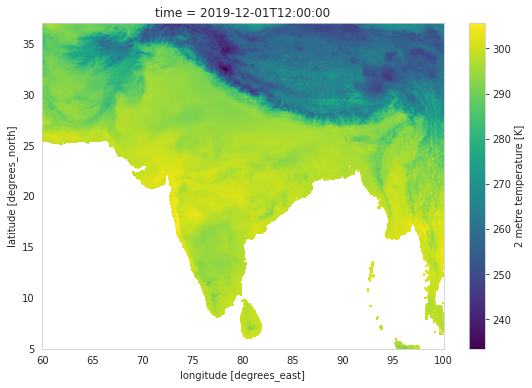

In [49]:
xdata['t2m'].isel(time=0).sel(longitude=slice(60,100), latitude=slice(30,25)).plot(size=6)

1. 1st observation is the whole india region is yellow which means the temp. is around 300k+.
2. The west part is having more temp. in December compared to the east parts like (kolkata,bihar etc.)
3. If we perform upscalling and go to more specific areas then we would be able to understand more details as this plot is giving as overview of that.(We know the temp. in south part of west bengal is more warmer that the north part, so we may also discover that by doing upscalling)

## Change of `t2m` each day in India:

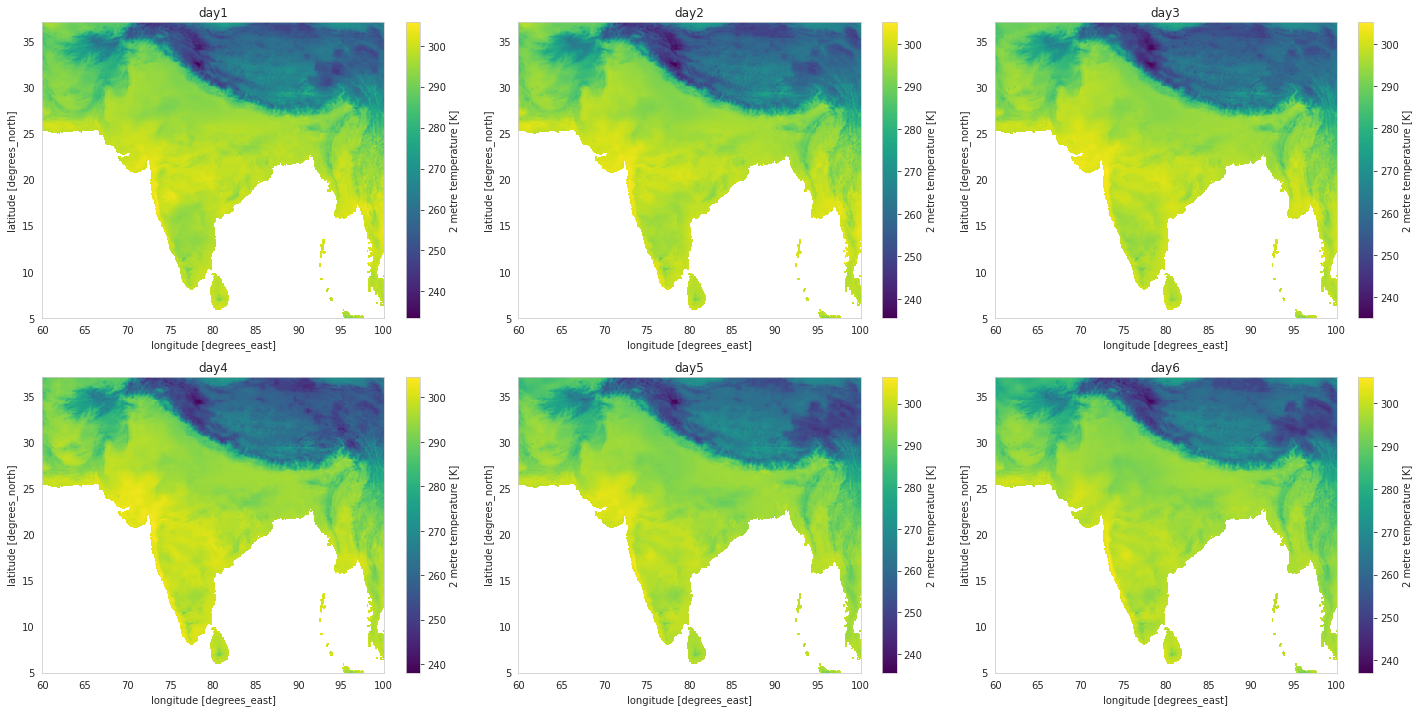

In [63]:
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(20, 10))
# fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
# plt.figure(figsize=(10, 20))
xdata['t2m'].isel(time=0).sel(longitude=slice(60,100), latitude=slice(37,5)).plot(ax=axes[0,0])
xdata['t2m'].isel(time=1).sel(longitude=slice(60,100), latitude=slice(37,5)).plot(ax=axes[0,1])
xdata['t2m'].isel(time=2).sel(longitude=slice(60,100), latitude=slice(37,5)).plot(ax=axes[0,2])
xdata['t2m'].isel(time=3).sel(longitude=slice(60,100), latitude=slice(37,5)).plot(ax=axes[1,0])
xdata['t2m'].isel(time=4).sel(longitude=slice(60,100), latitude=slice(37,5)).plot(ax=axes[1,1])
xdata['t2m'].isel(time=5).sel(longitude=slice(60,100), latitude=slice(37,5)).plot(ax=axes[1,2])
# dsi['t2m'].isel(time=slice(6,7)).plot(ax=axes[1])
# data['t2m'].isel(time=slice(3,4)).plot(ax=axes[1,0])
# data['t2m'].isel(time=slice(4,5)).plot(ax=axes[1,1])
# air1d.plot(ax=axes[0])
axes[0,0].set_title("day1")
axes[0,1].set_title("day2")
axes[0,2].set_title("day3")
axes[1,0].set_title("day4")
axes[1,1].set_title("day5")
axes[1,2].set_title("day6")
fig.tight_layout()
# plt.subplot_tool()
plt.show()

Text(0.5, 1.0, 'Dat7')

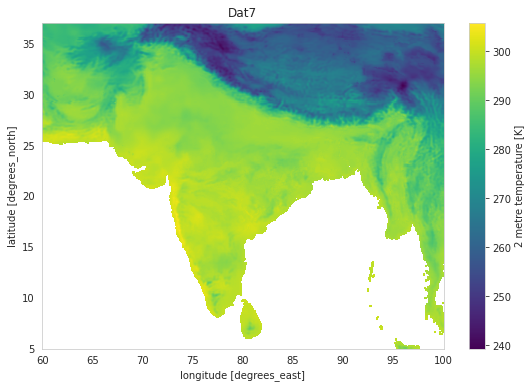

In [67]:
xdata['t2m'].isel(time=6).sel(longitude=slice(60,100), latitude=slice(37,5)).plot(size=6)
plt.title("Dat7")

## histogram plot of `t2m` each day in india:

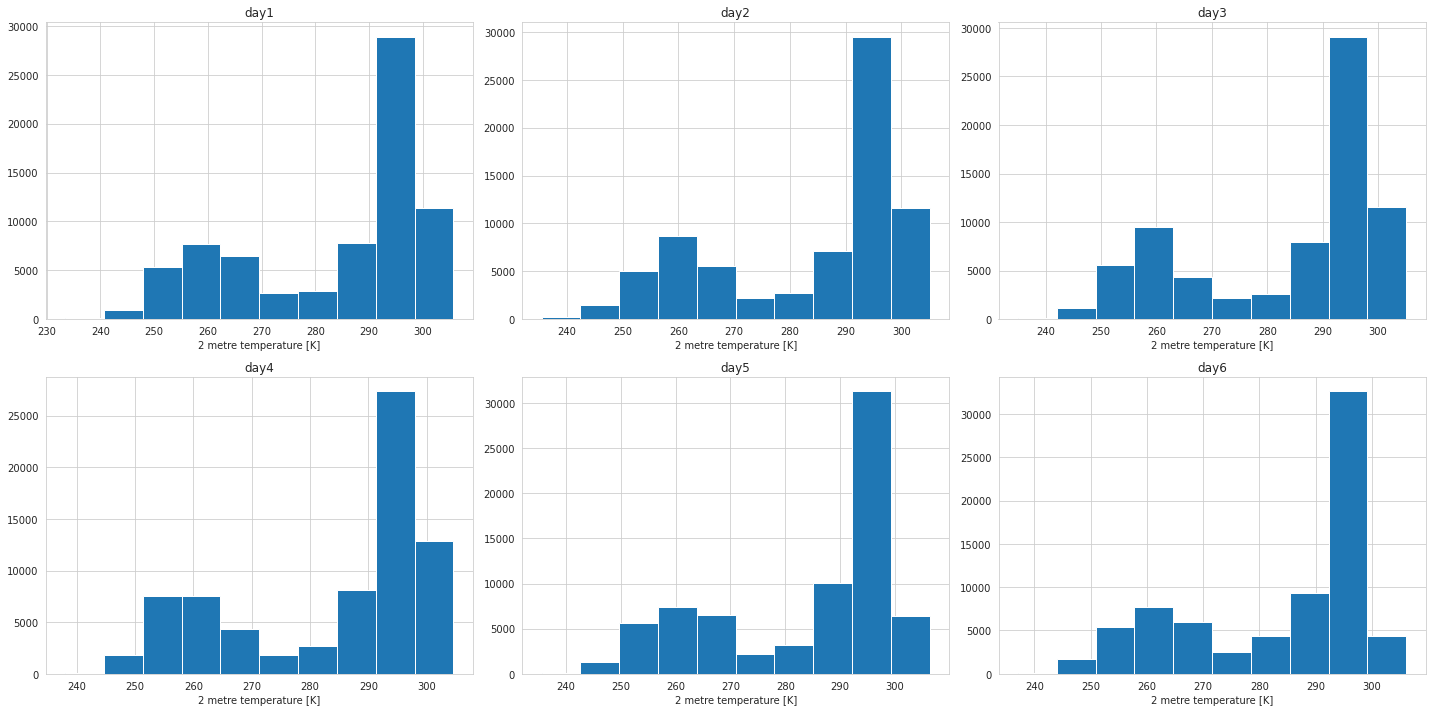

In [66]:
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(20, 10))
# fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
# plt.figure(figsize=(10, 20))
xdata['t2m'].isel(time=0).sel(longitude=slice(60,100), latitude=slice(37,5)).plot.hist(ax=axes[0,0])
xdata['t2m'].isel(time=1).sel(longitude=slice(60,100), latitude=slice(37,5)).plot.hist(ax=axes[0,1])
xdata['t2m'].isel(time=2).sel(longitude=slice(60,100), latitude=slice(37,5)).plot.hist(ax=axes[0,2])
xdata['t2m'].isel(time=3).sel(longitude=slice(60,100), latitude=slice(37,5)).plot.hist(ax=axes[1,0])
xdata['t2m'].isel(time=4).sel(longitude=slice(60,100), latitude=slice(37,5)).plot.hist(ax=axes[1,1])
xdata['t2m'].isel(time=5).sel(longitude=slice(60,100), latitude=slice(37,5)).plot.hist(ax=axes[1,2])
# dsi['t2m'].isel(time=slice(6,7)).plot(ax=axes[1])
# data['t2m'].isel(time=slice(3,4)).plot(ax=axes[1,0])
# data['t2m'].isel(time=slice(4,5)).plot(ax=axes[1,1])
# air1d.plot(ax=axes[0])
axes[0,0].set_title("day1")
axes[0,1].set_title("day2")
axes[0,2].set_title("day3")
axes[1,0].set_title("day4")
axes[1,1].set_title("day5")
axes[1,2].set_title("day6")
fig.tight_layout()
# plt.subplot_tool()
plt.show()

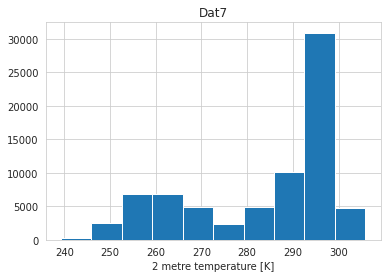

In [69]:
xdata['t2m'].isel(time=6).sel(longitude=slice(60,100), latitude=slice(37,5)).plot.hist(size=4)
plt.title("Dat7")
plt.grid(True)

1. It seem like temp. dont much change as days progrsses.


In [ ]:
# xdata['t2m'].isel(time=0).sel(longitude=slice(60,100), latitude=slice(37,5)).plot(size=6) 
#APPLY INTERPOLATION

## Mean value of `t2m` each day in the whole india region:

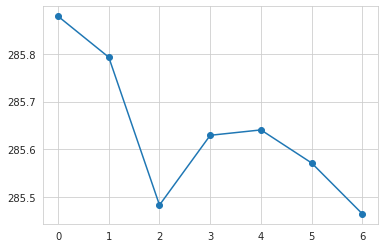

In [127]:
t2m_per_day = []
for i in range(7):
  t2m_per_day.append(xdata['t2m'].isel(time=i).sel(longitude=slice(65,100), latitude=slice(35,5)).mean())
plt.plot(t2m_per_day,marker="o")


1. It seems like the temp stays around 285k and the changes are vey minor.
2. This proves the above points from thr previous plot.

### Calculate the basic statistics with some comments:

In [2]:
print("median is {}".format(float(xdata['t2m'].isel(time=0).mean())))
print("median is {}".format(float(xdata['t2m'].isel(time=0).median())))
print("standard deviation is {}".format(float(xdata['t2m'].isel(time=0).std())))
print("variance is {}".format(float(xdata['t2m'].isel(time=0).var())))
print("max is {}".format(float(xdata['t2m'].isel(time=0).max())))
print("min is {}".format(float(xdata['t2m'].isel(time=0).min())))

median is 263.7310791015625
<br>
standard deviation is 21.810977935791016
<br>
variance is 475.7187194824219
<br>
max is 313.00372314453125
<br>
min is 225.7352294921875

1. This is the basic stats of `t2m` from all coordinates the world.

### Nan value plot for `t2m`:

This shows which are the places ehich have Nan values.This clearly shows that data was not been captured for sea regions.

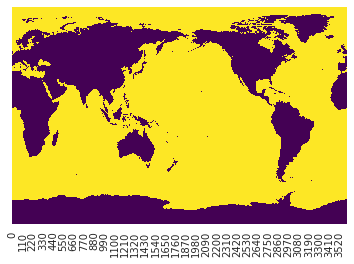

In [150]:
sns.heatmap(xdata['t2m'].isel(time=0).isnull(),yticklabels=False,cbar=False,cmap='viridis')
#Yellow part is nan values 

# Analysis for `tp`:



|Name|Unit|Description|
|----|----|-----------|
|Total precipitation(tp)|m|**Accumulated liquid and frozen water, including rain and snow, that falls to the Earth's surface. It is the sum of large-scale precipitation (that precipitation which is generated by large-scale weather patterns, such as troughs and cold fronts) and convective precipitation (generated by convection which occurs when air at lower levels in the atmosphere is warmer and less dense than the air above, so it rises). Precipitation variables do not include fog, dew or the precipitation that evaporates in the atmosphere before it lands at the surface of the Earth. This variable is accumulated from the beginning of the forecast time to the end of the forecast step. The units of precipitation are depth in metres. It is the depth the water would have if it were spread evenly over the grid box. Care should be taken when comparing model variables with observations, because observations are often local to a particular point in space and time, rather than representing averages over a model grid box and model time step.**|

## Change of `tp` per day in all longitude and latitude:

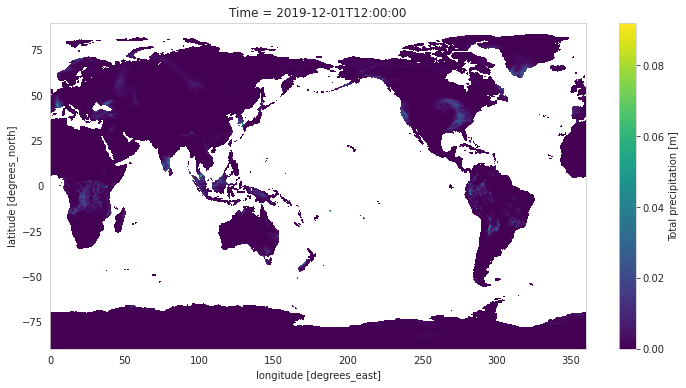

In [75]:
# Get a handle on the figure and the axes
fig, ax = plt.subplots(figsize=(12,6))

# Plot the initial frame. 
cax = xdata['tp'][0,:,:].plot(
    add_colorbar=True,
    cbar_kwargs={
        'extend':'neither'
    }
)
# xdata['t2m'].isel(time=slice(x,x+1))  
# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    # cax.set_array(tas[frame,:,:].values.flatten())
    cax.set_array(xdata['tp'][frame,:,:].values.flatten())
    ax.set_title("Time = " + str(xdata['tp'].coords['time'].values[frame])[:19])

# Finally, we use the animation module to create the animation.
ani2 = FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=6,       # Could also be iterable or list
    interval=200     # ms between frames
)

In [76]:
HTML(ani2.to_jshtml())

please run the above cell to view the animation.

## Histogram of Each day for `tp`:

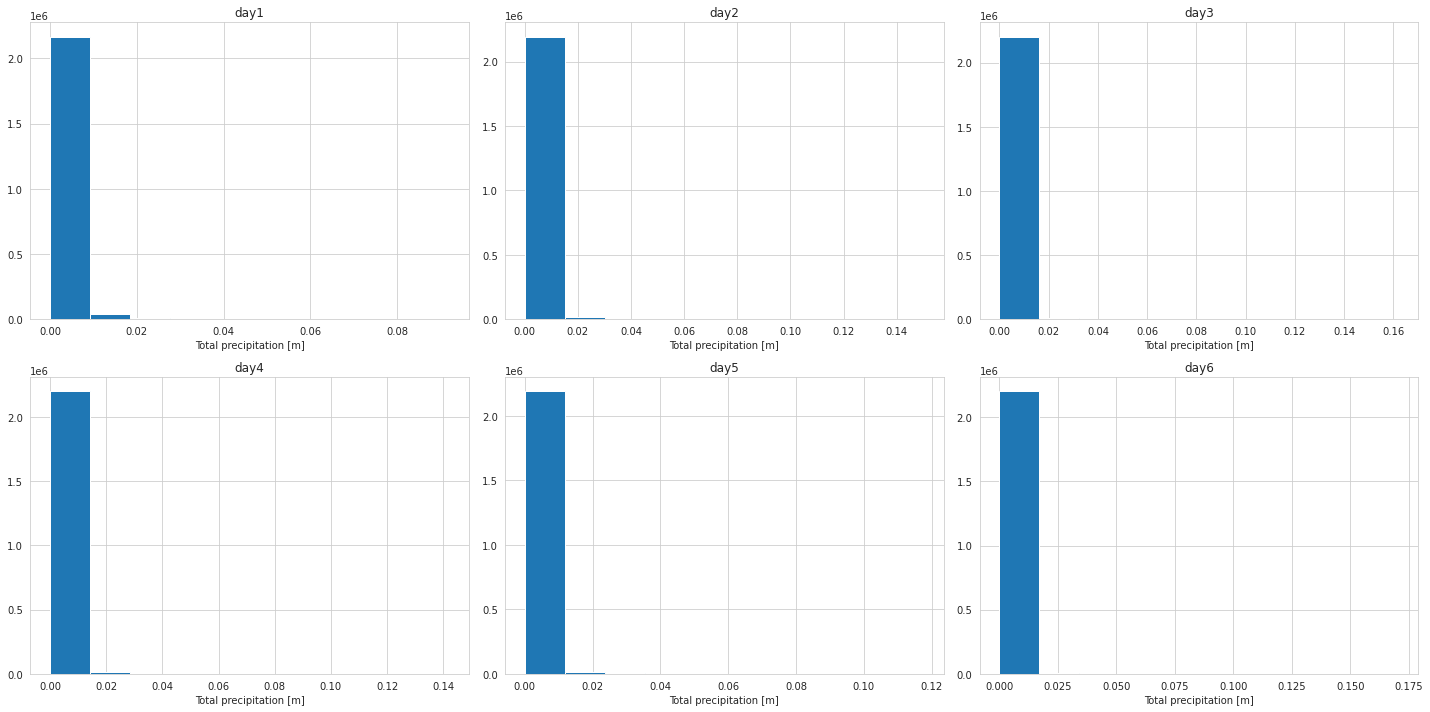

In [77]:
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(20, 10))
# fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
# plt.figure(figsize=(10, 20))
xdata['tp'].isel(time=slice(0,1)).plot.hist(ax=axes[0,0])
xdata['tp'].isel(time=slice(1,2)).plot.hist(ax=axes[0,1])
xdata['tp'].isel(time=slice(2,3)).plot.hist(ax=axes[0,2])
xdata['tp'].isel(time=slice(3,4)).plot.hist(ax=axes[1,0])
xdata['tp'].isel(time=slice(4,5)).plot.hist(ax=axes[1,1])
xdata['tp'].isel(time=slice(5,6)).plot.hist(ax=axes[1,2])
# dsi['t2m'].isel(time=slice(6,7)).plot(ax=axes[1])
# data['t2m'].isel(time=slice(3,4)).plot(ax=axes[1,0])
# data['t2m'].isel(time=slice(4,5)).plot(ax=axes[1,1])
# air1d.plot(ax=axes[0])
axes[0,0].set_title("day1")
axes[0,1].set_title("day2")
axes[0,2].set_title("day3")
axes[1,0].set_title("day4")
axes[1,1].set_title("day5")
axes[1,2].set_title("day6")
fig.tight_layout()
# plt.subplot_tool()
plt.show()

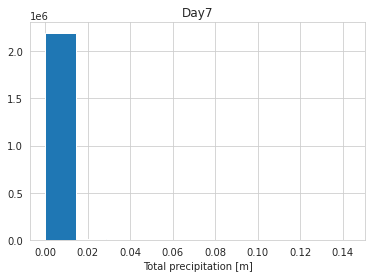

In [116]:
xdata['tp'].isel(time=slice(6,7)).plot.hist()
plt.title("Day7")
plt.grid(True)

# Place specific Analysis:
In this section I have taken two places for analysis of all of the variables, which are Himalayas and Whole India. I have done different analysis for these two place, please look into them.

## Lets look how `tp` changes per day in Himalayas

## Line plot of change of tp per day at Himalaya:

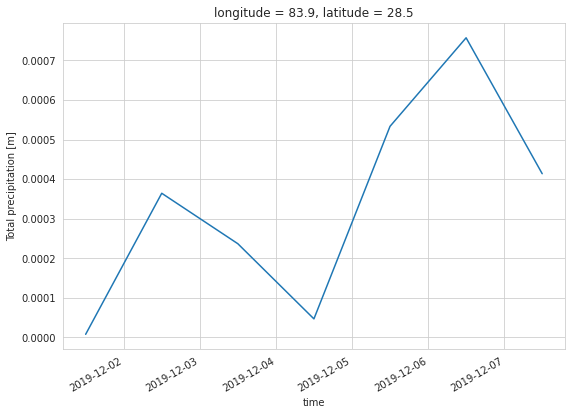

In [81]:
xdata['tp'].sel(time=slice('2019-12-01 12:00:00','2019-12-07 12:00:00')).sel(latitude=28.5, longitude=83.9, method='nearest').plot(size=6)

# heatmap for `tp` for Himalayas:

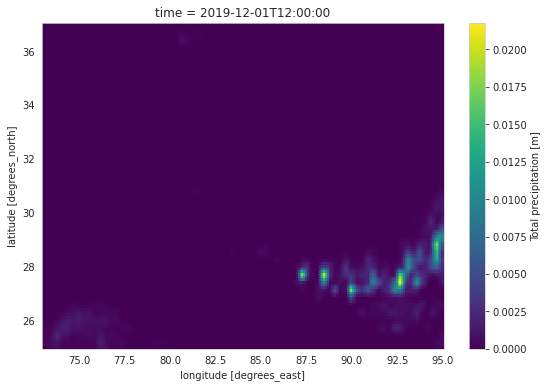

In [82]:
xdata['tp'].isel(time=0).sel(longitude=slice(73,95), latitude=slice(37,25)).plot(size=6)

# Heatmap of tp for indian regions: 

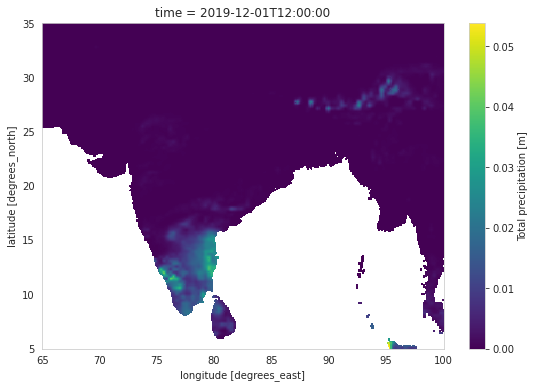

In [90]:
xdata['tp'].isel(time=0).sel(longitude=slice(65,100), latitude=slice(35,5)).plot(size=6)

## heatamp of each day for tp:

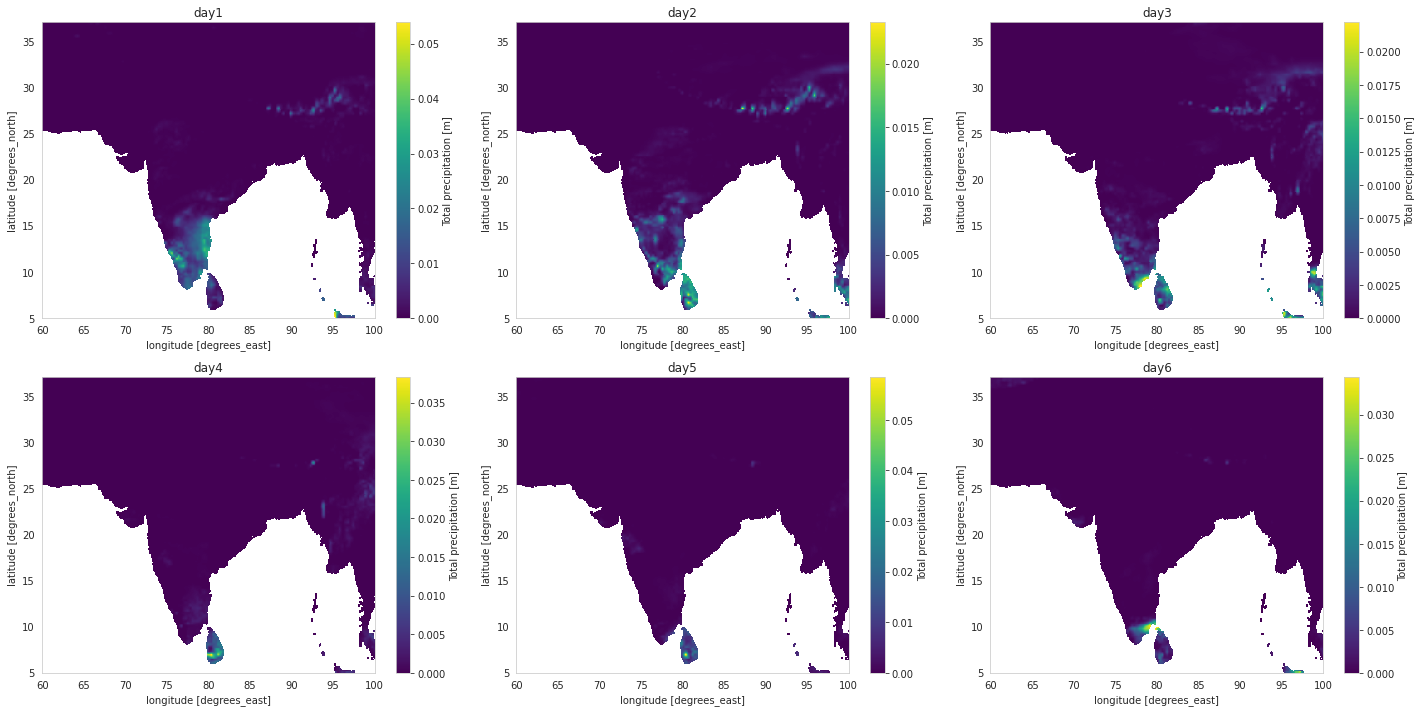

In [125]:
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(20, 10))
# fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
# plt.figure(figsize=(10, 20))
xdata['tp'].isel(time=0).sel(longitude=slice(60,100), latitude=slice(37,5)).plot(ax=axes[0,0])
xdata['tp'].isel(time=1).sel(longitude=slice(60,100), latitude=slice(37,5)).plot(ax=axes[0,1])
xdata['tp'].isel(time=2).sel(longitude=slice(60,100), latitude=slice(37,5)).plot(ax=axes[0,2])
xdata['tp'].isel(time=3).sel(longitude=slice(60,100), latitude=slice(37,5)).plot(ax=axes[1,0])
xdata['tp'].isel(time=4).sel(longitude=slice(60,100), latitude=slice(37,5)).plot(ax=axes[1,1])
xdata['tp'].isel(time=5).sel(longitude=slice(60,100), latitude=slice(37,5)).plot(ax=axes[1,2])
# dsi['t2m'].isel(time=slice(6,7)).plot(ax=axes[1])
# data['t2m'].isel(time=slice(3,4)).plot(ax=axes[1,0])
# data['t2m'].isel(time=slice(4,5)).plot(ax=axes[1,1])
# air1d.plot(ax=axes[0])
axes[0,0].set_title("day1")
axes[0,1].set_title("day2")
axes[0,2].set_title("day3")
axes[1,0].set_title("day4")
axes[1,1].set_title("day5")
axes[1,2].set_title("day6")
fig.tight_layout()
# plt.subplot_tool()
plt.show()

Text(0.5, 1.0, 'Dat7')

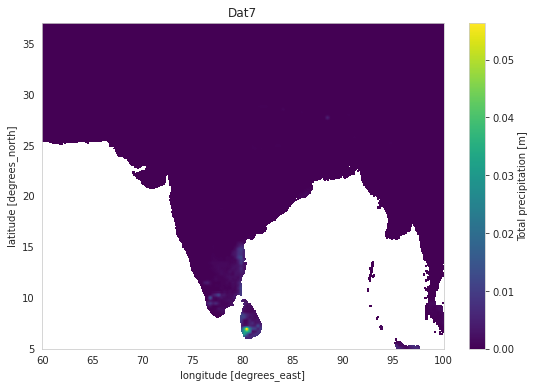

In [126]:
xdata['tp'].isel(time=6).sel(longitude=slice(60,100), latitude=slice(37,5)).plot(size=6)
plt.title("Dat7")

## Avg value of tp each day in this region:

In [103]:
tp_per_day = []
for i in range(7):
  tp_per_day.append(xdata['tp'].isel(time=i).sel(longitude=slice(65,100), latitude=slice(35,5)).mean())
type(tp_per_day)

list

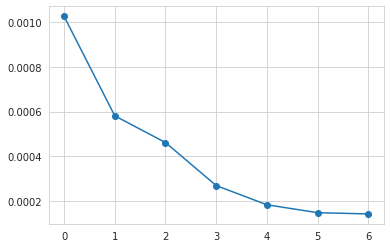

In [108]:
plt.plot(tp_per_day,marker="o")

#  Basic stats for tp:

In [138]:
print("median is {}".format(float(xdata['tp'].isel(time=0).median())))
print("standard deviation is {}".format(float(xdata['tp'].isel(time=0).std())))
print("variance is {}".format(float(xdata['tp'].isel(time=0).var())))
print("max is {}".format(float(xdata['tp'].isel(time=0).max())))
print("min is {}".format(float(xdata['tp'].isel(time=0).min())))

median is 1.5616416931152344e-05
standard deviation is 0.0025904655922204256
variance is 6.710512025165372e-06
max is 0.09205051511526108
min is 0.0


## Null/Nan value heatmap:
This is the nana value heatmap for `tp` which shows where the nan values belongs. I donwloaded the notebook from colab and I am editing this in my local, I guess because of that the plot is not showing up please run i you system to see that.

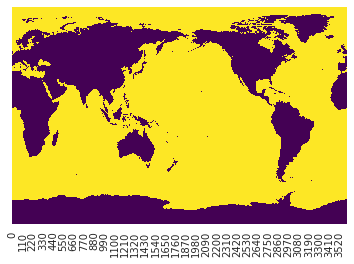

In [151]:
sns.heatmap(xdata['tp'].isel(time=0).isnull(),yticklabels=False,cbar=False,cmap='viridis')
#Yellow part is nan values 

# Analysis for `swvl1`:



|Name|Unit|Description|
|----|----|-----------|
|Volumetric soil water layer 1|m^3 m^-3|**Volume of water in soil layer 1 (0 - 7 cm) of the ECMWF Integrated Forecasting System. The surface is at 0 cm. The volumetric soil water is associated with the soil texture (or classification), soil depth, and the underlying groundwater level.**|

# Change of `swvl1` per day in all longitude and latitude:

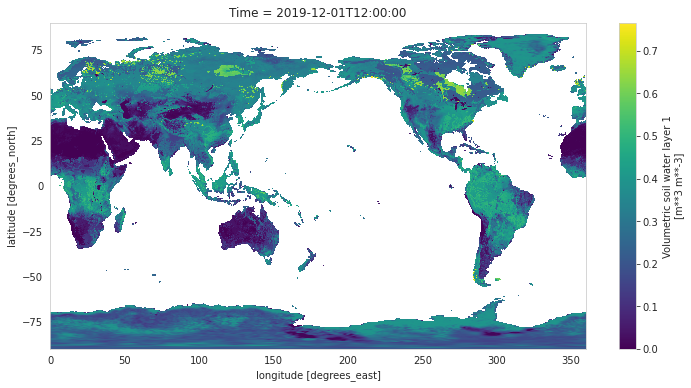

In [111]:
# Get a handle on the figure and the axes
fig, ax = plt.subplots(figsize=(12,6))

# Plot the initial frame. 
cax = xdata['swvl1'][0,:,:].plot(
    add_colorbar=True,
    cbar_kwargs={
        'extend':'neither'
    }
)
# xdata['t2m'].isel(time=slice(x,x+1))  
# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    # cax.set_array(tas[frame,:,:].values.flatten())
    cax.set_array(xdata['swvl1'][frame,:,:].values.flatten())
    ax.set_title("Time = " + str(xdata['swvl1'].coords['time'].values[frame])[:19])

# Finally, we use the animation module to create the animation.
ani3 = FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=6,       # Could also be iterable or list
    interval=200     # ms between frames
)

In [112]:
HTML(ani3.to_jshtml())

## Histogram of Each day for `swvl1`:

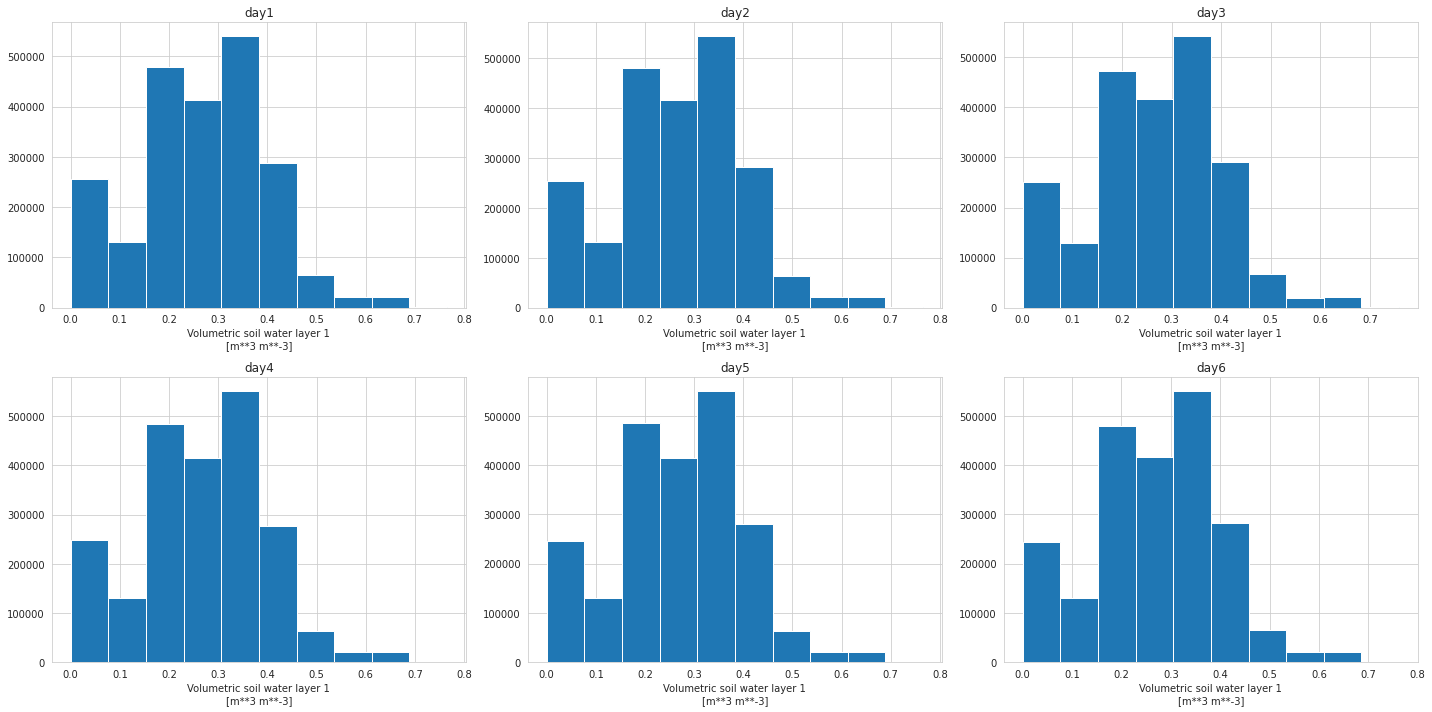

In [113]:
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(20, 10))
# fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
# plt.figure(figsize=(10, 20))
xdata['swvl1'].isel(time=slice(0,1)).plot.hist(ax=axes[0,0])
xdata['swvl1'].isel(time=slice(1,2)).plot.hist(ax=axes[0,1])
xdata['swvl1'].isel(time=slice(2,3)).plot.hist(ax=axes[0,2])
xdata['swvl1'].isel(time=slice(3,4)).plot.hist(ax=axes[1,0])
xdata['swvl1'].isel(time=slice(4,5)).plot.hist(ax=axes[1,1])
xdata['swvl1'].isel(time=slice(5,6)).plot.hist(ax=axes[1,2])
# dsi['t2m'].isel(time=slice(6,7)).plot(ax=axes[1])
# data['t2m'].isel(time=slice(3,4)).plot(ax=axes[1,0])
# data['t2m'].isel(time=slice(4,5)).plot(ax=axes[1,1])
# air1d.plot(ax=axes[0])
axes[0,0].set_title("day1")
axes[0,1].set_title("day2")
axes[0,2].set_title("day3")
axes[1,0].set_title("day4")
axes[1,1].set_title("day5")
axes[1,2].set_title("day6")
fig.tight_layout()
# plt.subplot_tool()
plt.show()

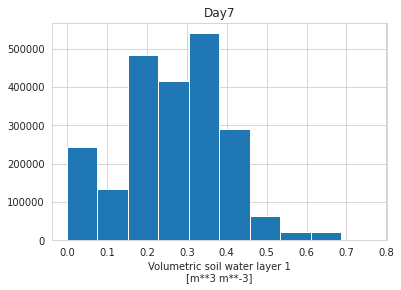

In [115]:
xdata['swvl1'].isel(time=slice(6,7)).plot.hist()
plt.title("Day7")
plt.grid(True)

# Place specific Analysis:
In this section I have taken two places for analysis of all of the variables, which are Himalayas and Whole India. I have done different analysis for these two place, please look into them.

## Lets look how `swvl1` changes per day in Himalayas

## Line plot of change of swv1 per day at Himalaya:

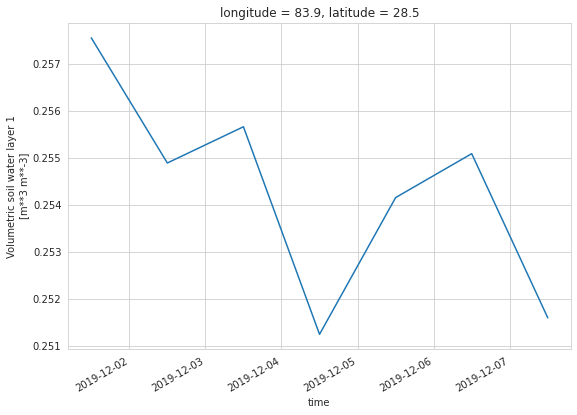

In [117]:
xdata['swvl1'].sel(time=slice('2019-12-01 12:00:00','2019-12-07 12:00:00')).sel(latitude=28.5, longitude=83.9, method='nearest').plot(size=6)

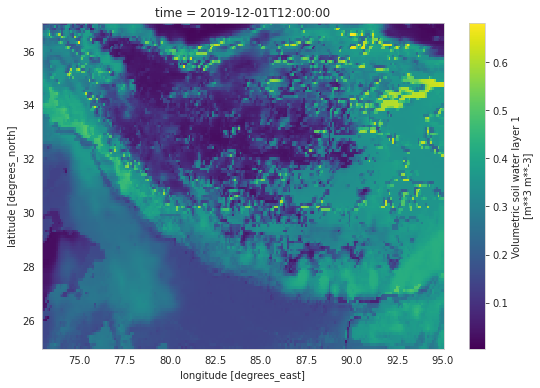

In [118]:
xdata['swvl1'].isel(time=0).sel(longitude=slice(73,95), latitude=slice(37,25)).plot(size=6)

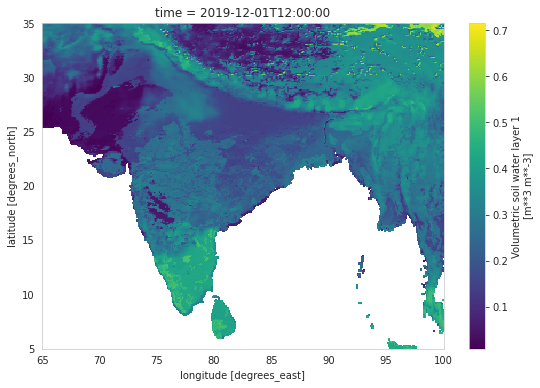

In [119]:
xdata['swvl1'].isel(time=0).sel(longitude=slice(65,100), latitude=slice(35,5)).plot(size=6)

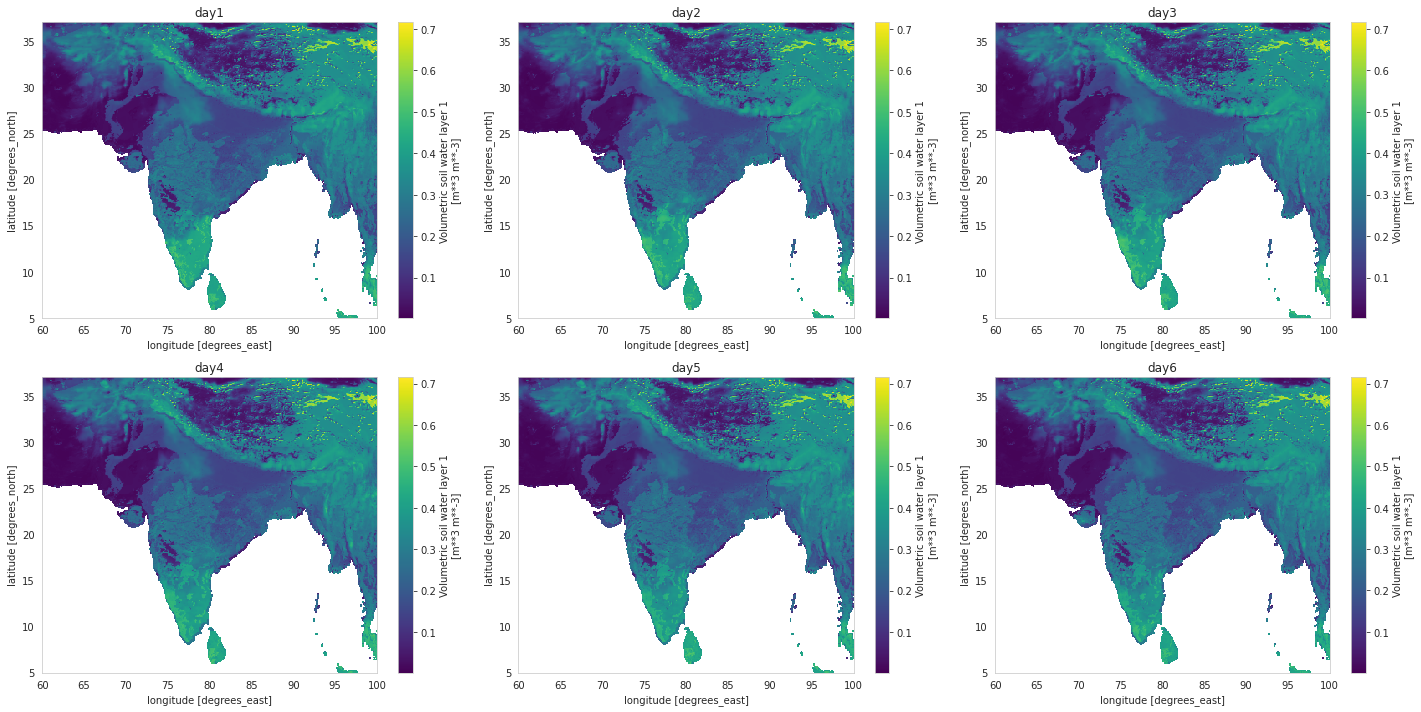

In [123]:
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(20, 10))
# fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
# plt.figure(figsize=(10, 20))
xdata['swvl1'].isel(time=0).sel(longitude=slice(60,100), latitude=slice(37,5)).plot(ax=axes[0,0])
xdata['swvl1'].isel(time=1).sel(longitude=slice(60,100), latitude=slice(37,5)).plot(ax=axes[0,1])
xdata['swvl1'].isel(time=2).sel(longitude=slice(60,100), latitude=slice(37,5)).plot(ax=axes[0,2])
xdata['swvl1'].isel(time=3).sel(longitude=slice(60,100), latitude=slice(37,5)).plot(ax=axes[1,0])
xdata['swvl1'].isel(time=4).sel(longitude=slice(60,100), latitude=slice(37,5)).plot(ax=axes[1,1])
xdata['swvl1'].isel(time=5).sel(longitude=slice(60,100), latitude=slice(37,5)).plot(ax=axes[1,2])
# dsi['t2m'].isel(time=slice(6,7)).plot(ax=axes[1])
# data['t2m'].isel(time=slice(3,4)).plot(ax=axes[1,0])
# data['t2m'].isel(time=slice(4,5)).plot(ax=axes[1,1])
# air1d.plot(ax=axes[0])
axes[0,0].set_title("day1")
axes[0,1].set_title("day2")
axes[0,2].set_title("day3")
axes[1,0].set_title("day4")
axes[1,1].set_title("day5")
axes[1,2].set_title("day6")
fig.tight_layout()
# plt.subplot_tool()
plt.show()

Text(0.5, 1.0, 'Dat7')

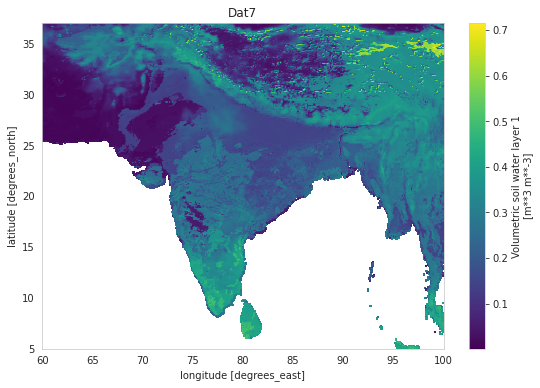

In [124]:
xdata['swvl1'].isel(time=6).sel(longitude=slice(60,100), latitude=slice(37,5)).plot(size=6)
plt.title("Dat7")

In [121]:
swvl1_per_day = []
for i in range(7):
  swvl1_per_day.append(xdata['swvl1'].isel(time=i).sel(longitude=slice(65,100), latitude=slice(35,5)).mean())
type(swvl1_per_day)

list

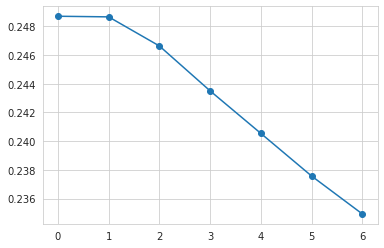

In [122]:
plt.plot(swvl1_per_day,marker="o")

In [137]:
print("median is {}".format(float(xdata['swvl1'].isel(time=0).median())))
print("standard deviation is {}".format(float(xdata['swvl1'].isel(time=0).std())))
print("variance is {}".format(float(xdata['swvl1'].isel(time=0).var())))
print("max is {}".format(float(xdata['swvl1'].isel(time=0).max())))
print("min is {}".format(float(xdata['swvl1'].isel(time=0).min())))

median is 0.26997774839401245
standard deviation is 0.13108587265014648
variance is 0.01718350686132908
max is 0.7660064697265625
min is 0.0


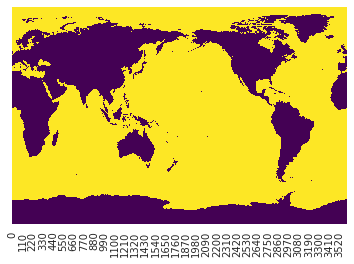

In [141]:
sns.heatmap(xdata['swvl1'].isel(time=0).isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
dsi_df = dsi.to_dataframe()

In [ ]:
df2 = dsi_df.copy()
df3 = df2.tail(30000)
df3.reset_index(inplace=True)
df3.to_csv('interpolated_data.csv')